### This notebook takes export annotation files from labelbox and locally saves the corresponding images and corresponding coco.json file
#### Also allows visualization of the resulting annotations

In [1]:
import os
import sys
import json

geladas_root = os.path.dirname(os.path.dirname(os.getcwd()))
local_paths_file = os.path.join(geladas_root, 'local-paths.json')
with open(local_paths_file, "r") as json_file:
    local_paths = json.load(json_file)

sys.path.append(local_paths['overhead_functions_path'])
from labelbox_processing import labelbox_to_coco
from json_functions import create_train_val_split

In [2]:
# Path to where annotated images should be saved
images_save_folder = os.path.join(local_paths['annotations_folder'], 
                                  "annotated_images")
# Path to where annotation cocojson file should be saved
coco_json_folder = local_paths['annotations_folder']
# name of the exported file from labelbox
labelbox_json_name = "export-2022-01-05T15_54_50.050Z-test.json"
labelbox_json_name = "export-2022-01-06T14_28_01.837Z-original_annotations.json"
labelbox_json_name = "export-2022-01-05T15_54_11.401Z-val.json"
labelbox_json_name = "export-2022-01-05T15_53_24.697Z-training.json"
labelbox_json_name = "export-2022-04-28T08_54_37.624Z.json"
labelbox_json_file =  os.path.join(local_paths['labelbox_folder'], 
                                   labelbox_json_name)

In [3]:
def get_gelada_class(ann):
    if 'classifications' not in ann.keys():
        return ann['value']
    for feature in ann['classifications']:
        if feature['title'] == 'status':
            if feature['answer']['value'] == 'adult_male':
                return feature['answer']['value']
            else:
                return ann['value']

In [4]:
# Info to include in the coco annotation file being created
dataset_description = "gelada dataset with males"
dataset_date = "April.27.2022"

# The name of the created json file will be based on the name of labelbox file
coco_json_name = f"coco_males_{os.path.basename(labelbox_json_file)}"
coco_json_file = os.path.join(coco_json_folder, coco_json_name)

In [5]:
# Save the images and created coco format json file that corresponds to the
# labelbox.json file being used
labelbox_to_coco(labelbox_json_file, 
                 coco_json_file,
                 images_save_folder, 
                 description=dataset_description, 
                 date=dataset_date,
                 overwrite=False, 
                 verbose=True,
                 custom_class_reader=get_gelada_class
                )   

1 adult_male
2 gelada
saving at /mount/zfs-kn/gelada_project/annotation/coco_males_export-2022-04-28T08_54_37.624Z.json
118 annotations from 9 images saved.


### Code below can be used to visualize saved annotations

In [6]:
import cv2
import matplotlib.pyplot as plt

from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer

In [7]:
register_coco_instances("visualize", {}, 
                        coco_json_file, 
                        images_save_folder
                       )
data_metadata = MetadataCatalog.get("visualize")
data_dicts = DatasetCatalog.get("visualize")

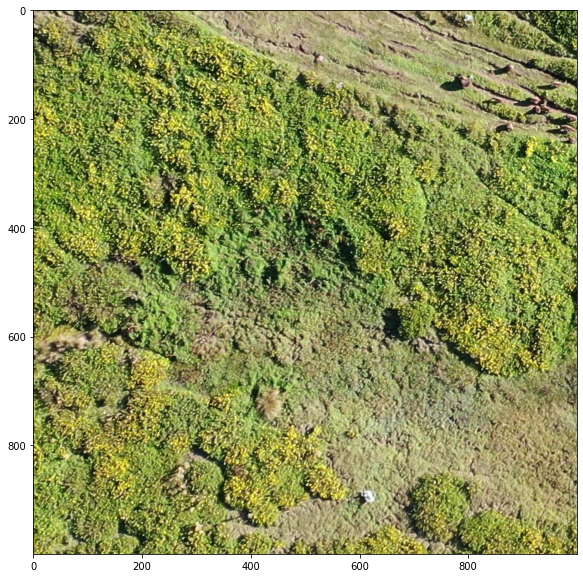

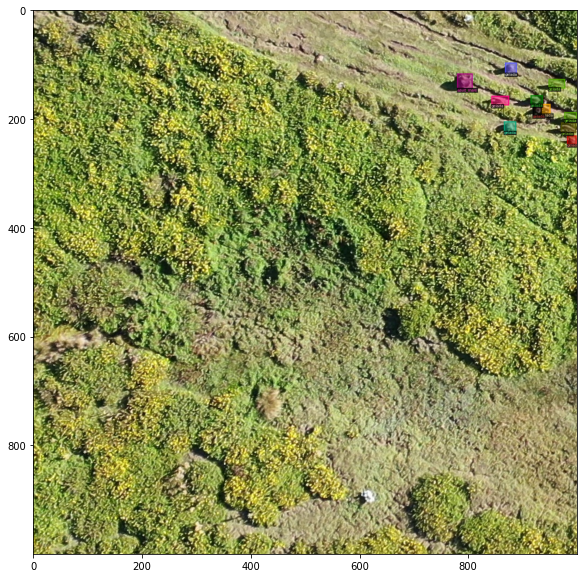

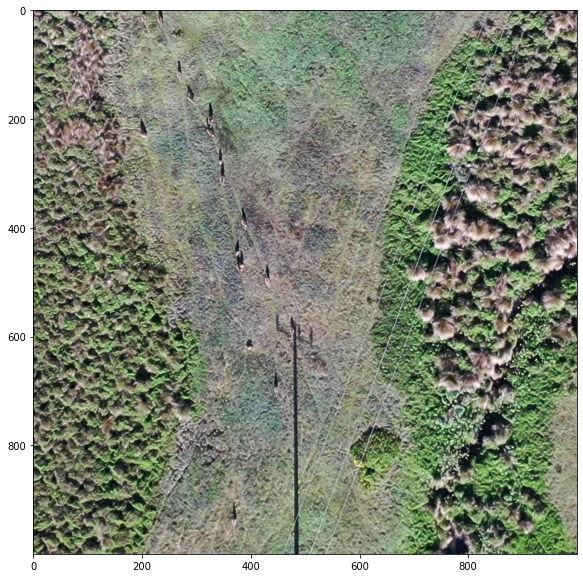

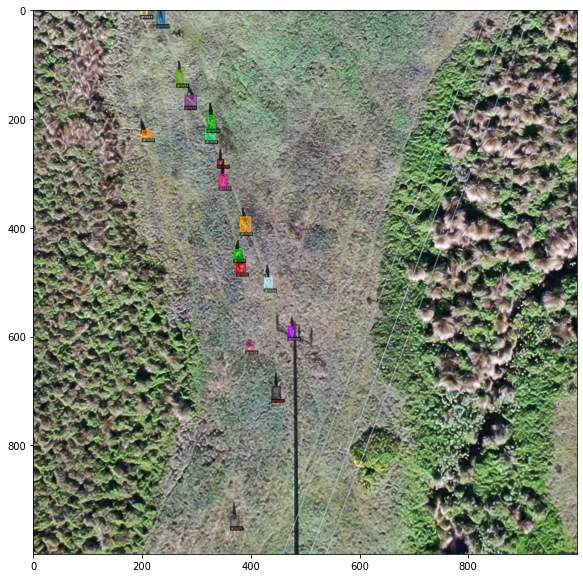

In [8]:
for d in data_dicts[:2]:
    img = cv2.imread(d["file_name"])
    plt.figure(figsize=(10, 10))
    plt.imshow(img[..., ::-1])
    visualizer = Visualizer(img[:, :, ::-1], 
                            metadata=data_metadata, 
                            scale=1.0
                           )
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize=(10, 10))
    plt.imshow(vis.get_image())